# Implementacion de Epsilon-Greedy

Se importan las librerías necesarias para ejecutar el entorno `SnakeEnv`, utilizar funciones aleatorias, cálculos numéricos, y graficar resultados.

In [1]:
from snake_v1 import SnakeEnv
import numpy as np
import random
import matplotlib.pyplot as plt
import pygame

# Inicializar el entorno
env = SnakeEnv()

# Parámetros del algoritmo
episodes = 5000
epsilon = 0.1    # Probabilidad de exploración
alpha = 0.1      # Tasa de aprendizaje
gamma = 0.9      # Factor de descuento
scores = []      # Lista para almacenar puntajes

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Inicialización del Q-Table y espacio de estados
Se generan todos los posibles estados discretos para la tabla Q y el conteo de visitas a cada acción `N`, necesaria para la actualización incremental.

In [2]:
# Inicializar tabla Q con valores aleatorios pequeños
Q = {}

def get_q_value(state, action):
    """Obtiene el valor Q para un estado-acción, inicializando si no existe"""
    if state not in Q:
        Q[state] = np.random.uniform(low=-1, high=1, size=len(env.actions))
    return Q[state][action]

def choose_action(state):
    """Selecciona una acción usando la política epsilon-greedy"""
    if random.uniform(0, 1) < epsilon:
        # Exploración: acción aleatoria
        return random.choice(env.actions)
    else:
        # Explotación: mejor acción conocida
        if state not in Q:
            Q[state] = np.random.uniform(low=-1, high=1, size=len(env.actions))
        return np.argmax(Q[state])

# Entrenamiento del agente con técnica incremental
Se entrena al agente usando distintos valores de epsilon (`ε`), midiendo tanto la recompensa por episodio como la cantidad de exploraciones realizadas.

In [3]:
# Entrenamiento
rewards_history = []

for episode in range(episodes):
    state = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        # Seleccionar acción
        action = choose_action(state)
        
        # Ejecutar acción
        next_state, reward, done = env.step(action)
        episode_reward += reward
        
        # Actualizar Q-value
        old_value = get_q_value(state, action)
        next_max = np.max(Q.get(next_state, np.zeros(len(env.actions))))
        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        Q[state][action] = new_value
        
        state = next_state
    
    scores.append(env.score)
    rewards_history.append(episode_reward)
    
    if (episode + 1) % 100 == 0:
        avg_score = np.mean(scores[-100:])
        print(f"Episodio {episode + 1}, Puntaje promedio: {avg_score:.2f}")

Episodio 100, Puntaje promedio: 0.66
Episodio 200, Puntaje promedio: 4.12
Episodio 300, Puntaje promedio: 4.68
Episodio 400, Puntaje promedio: 3.66
Episodio 500, Puntaje promedio: 4.30
Episodio 600, Puntaje promedio: 4.08
Episodio 700, Puntaje promedio: 5.09
Episodio 800, Puntaje promedio: 6.55
Episodio 900, Puntaje promedio: 2.54
Episodio 1000, Puntaje promedio: 3.06
Episodio 1100, Puntaje promedio: 5.34
Episodio 1200, Puntaje promedio: 5.49
Episodio 1300, Puntaje promedio: 8.19
Episodio 1400, Puntaje promedio: 6.84
Episodio 1500, Puntaje promedio: 6.49
Episodio 1600, Puntaje promedio: 6.25
Episodio 1700, Puntaje promedio: 7.15
Episodio 1800, Puntaje promedio: 6.71
Episodio 1900, Puntaje promedio: 5.49
Episodio 2000, Puntaje promedio: 6.09
Episodio 2100, Puntaje promedio: 8.03
Episodio 2200, Puntaje promedio: 5.64
Episodio 2300, Puntaje promedio: 5.69
Episodio 2400, Puntaje promedio: 7.53
Episodio 2500, Puntaje promedio: 9.15
Episodio 2600, Puntaje promedio: 10.04
Episodio 2700, Punta

# Visualización de resultados
Se grafica el rendimiento del agente y el porcentaje de exploración por episodio, comparando los distintos valores de epsilon.

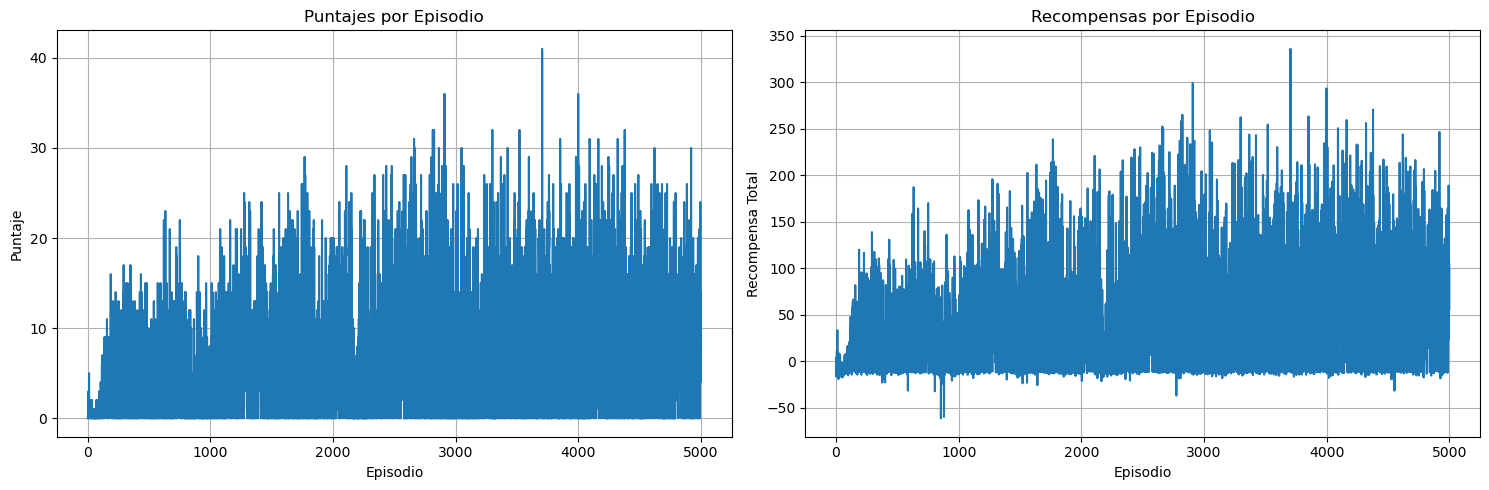

Puntaje promedio en últimos 100 episodios: 7.22
Recompensa promedio en últimos 100 episodios: 50.23


In [4]:
# Visualización de resultados
plt.figure(figsize=(15, 5))

# Subplot para puntajes
plt.subplot(1, 2, 1)
plt.plot(scores)
plt.title('Puntajes por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Puntaje')
plt.grid(True)

# Subplot para recompensas
plt.subplot(1, 2, 2)
plt.plot(rewards_history)
plt.title('Recompensas por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.grid(True)

plt.tight_layout()
plt.show()

# Estadísticas finales
print(f"Puntaje promedio en últimos 100 episodios: {np.mean(scores[-100:]):.2f}")
print(f"Recompensa promedio en últimos 100 episodios: {np.mean(rewards_history[-100:]):.2f}")

In [5]:
# Demostración del agente entrenado
def play_trained_agent():
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        pygame.event.pump()
        # Usar la política aprendida (sin exploración)
        action = np.argmax(Q.get(state, np.zeros(len(env.actions))))
        state, reward, done = env.step(action)
        total_reward += reward
        env.render()
        pygame.time.delay(100)
    
    pygame.quit()
    return total_reward, env.score

# Ejecutar demostración
reward, score = play_trained_agent()
print(f"Demostración finalizada - Puntaje: {score}, Recompensa total: {reward}")

Demostración finalizada - Puntaje: 27, Recompensa total: 217.6000000000018
